# Regressão Linear bayesiana

Foram usadas as esquações 3.50 e 3.51 para alimentar a distribuição preditiva dos parâmetros e as equações 3.58 e 3.59.

Para isso foram seguidos os passos: 

1. Inicializar Beta, Alpha, Média e Covariância.

2. Atualizar os parâmetros média e precisão.

3. Estimar amostras de W, Y e média preditiva.

4. Plotar distribuição dos parâmetros e retas das amostras e da média.



<img src="linear.png">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [2]:
df = pd.read_csv("linear_regression_data.csv", header= 0, names=["x","t"])

In [3]:
df['b'] = 1

In [4]:
X = df[['b','x']].to_numpy()
t = df[['t']].to_numpy()

In [5]:
#Inicializando

beta = 25
alpha = 25
mean_prev  = np.array([[0, 0]]).T
precision_prev  = np.eye(2)

#Atualizando Parâmetros

w_precision = precision_prev + beta * X.T @ X
w_mean = np.linalg.solve(w_precision, precision_prev @ mean_prev + beta * X.T @ t)
w_cov = np.linalg.inv(w_precision)

#Estimação

w_sample = np.random.multivariate_normal(w_mean.ravel(), w_cov, size=20)
y_sample = X @ w_sample.T
y_var = 1 / beta + np.sum(X @ w_cov * X, axis=1)
y_std = np.sqrt(y_var).reshape(-1,1)
t_pred = np.mean(y_sample,axis=1).reshape(-1,1)
t_pred_sup = t_pred + 2*y_std
t_pred_inf = t_pred - 2*y_std

#Instaciando distribuição

model = stats.multivariate_normal(mean=w_mean.ravel(), cov=w_cov)
model_0 = stats.multivariate_normal(mean=mean_prev.ravel(), cov=np.eye(2))

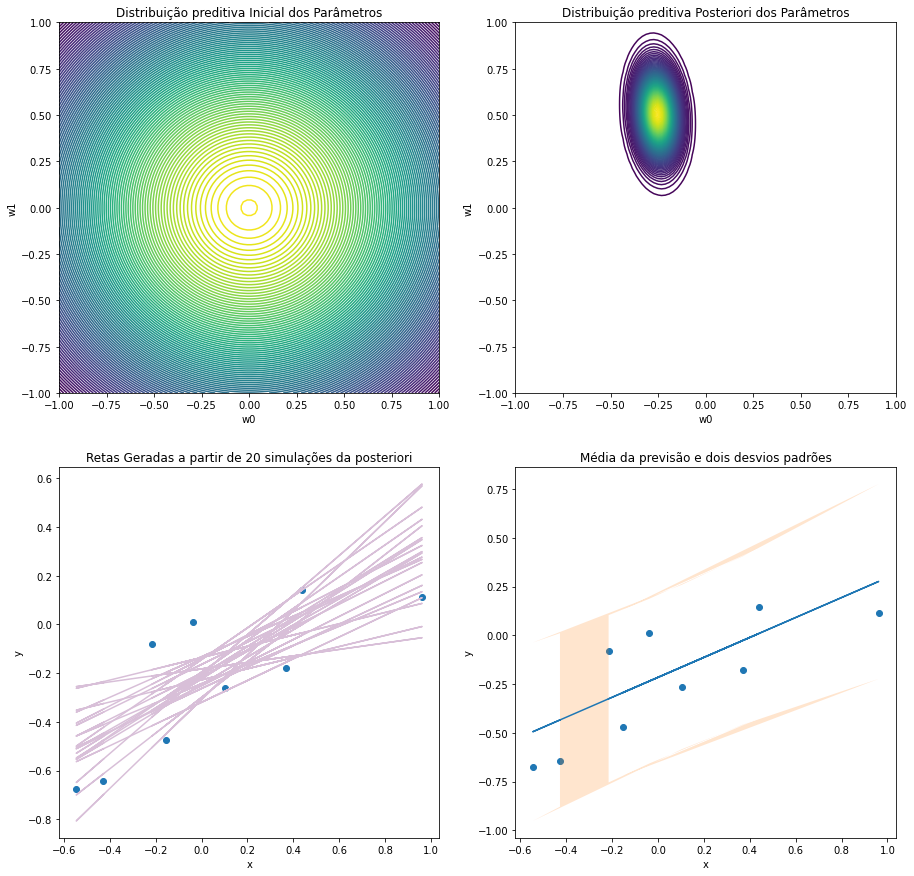

In [6]:
#Gráficos
w0 = np.linspace(-1,1,100)
w1 = np.linspace(-1,1,100)
W = np.dstack(np.meshgrid(w0, w1))

fig, ax = plt.subplots(2, 2,figsize=(15,15))

ax[0][0].contour(w0, w1, model_0.pdf(W), 100,cmap= 'viridis')
ax[0][0].set_xlabel('w0')
ax[0][0].set_ylabel('w1')
ax[0][0].set_title('Distribuição preditiva Inicial dos Parâmetros')


ax[0][1].contour(w0, w1, model.pdf(W), 100,cmap= 'viridis')
ax[0][1].set_xlabel('w0')
ax[0][1].set_ylabel('w1')
ax[0][1].set_title('Distribuição preditiva Posteriori dos Parâmetros')

ax[1][0].scatter(df.x,t)
ax[1][0].plot(df.x,y_sample,c='thistle')
ax[1][0].set_xlabel('x')
ax[1][0].set_ylabel('y')
ax[1][0].set_title('Retas Geradas a partir de 20 simulações da posteriori')

ax[1][1].scatter(df.x,t)
ax[1][1].plot(df.x,t_pred)
#plt.plot(df.x,t_pred_sup)
#plt.plot(df.x,t_pred_inf)
ax[1][1].fill_between(df.x, t_pred_sup.ravel(), t_pred_inf.ravel(),where= t_pred_sup.ravel() >= t_pred_inf.ravel(),alpha = 0.2)
ax[1][1].set_xlabel('x')
ax[1][1].set_ylabel('y')
ax[1][1].set_title('Média da previsão e dois desvios padrões')
#plt.legend(labels = ['t_pred','t_pred_sup','t_pred_inf'])
plt.savefig('Linear')








# Regressão Bayesiana polynomial

Foram usadas as esquações 3.50 e 3.51 para alimentar a distribuição preditiva dos parâmetros e as equações 3.58 e 3.59.

Para isso foram seguidos os passos: 

1. Inicializar Beta, Alpha, Média e Covariância.

2. Atualizar os parâmetros média e precisão.

3. Estimar amostras de W, Y e média preditiva.

4. Plotar retas das amostras e da média.



<img src="polinomial.png">

In [7]:
df_poly = pd.read_csv("polynomial_regression_data.csv", header= 0, names=["x","t"])

In [8]:
#Adicionando o vetor unitário para o viés (w_0) 
df_poly.insert(0,'b',1)

In [9]:
Grau_poly = 5

In [10]:
##Adicionando os atributos polinomiais no conjunto de dados
a = 2
b = 0
nome_da_coluna = []
for i in range(Grau_poly-1):
    nome_da_coluna.append('x_' + str(a))
    df_poly.insert(a, nome_da_coluna[b], df_poly['x']**a)
    b = b+1
    a = a+1

In [11]:
df_poly

,b,x,x_2,x_3,x_4,x_5,t
0,1,0.286139,0.081876,0.023428,0.006704,0.001918,0.910864
1,1,0.226851,0.051462,0.011674,0.002648,0.000601,0.939731
2,1,0.551315,0.303948,0.167571,0.092384,0.050933,-0.323798
3,1,0.719469,0.517636,0.372423,0.267947,0.192779,-0.872451
4,1,0.423106,0.179019,0.075744,0.032048,0.013560,0.417776
5,1,0.980764,0.961898,0.943396,0.925249,0.907451,-0.153078
6,1,0.684830,0.468992,0.321180,0.219953,0.150631,-0.949134
7,1,0.480932,0.231295,0.111237,0.053498,0.025729,0.281049
8,1,0.392118,0.153756,0.060290,0.023641,0.009270,0.787241


In [12]:
X_poly = df_poly.iloc[:,0:-1].to_numpy()
t_poly = df_poly[['t']].to_numpy()

In [13]:
#Inicializando
ndim = X_poly.shape[1]
beta = 25
alpha = 25
mean_prev_poly  = np.zeros(ndim).reshape(-1,1)
precision_prev_poly  = np.eye(ndim)

#Atualizando Parâmetros

w_precision_poly = precision_prev_poly + beta * X_poly.T @ X_poly
w_mean_poly = np.linalg.solve(w_precision_poly, precision_prev_poly @ mean_prev_poly + beta * X_poly.T @ t_poly)
w_cov_poly = np.linalg.inv(w_precision_poly)

#Estimação

w_sample_poly = np.random.multivariate_normal(w_mean_poly.ravel(), w_cov_poly, size=6)
y_sample_poly = X_poly @ w_sample_poly.T
y_var_poly = np.array(1 / beta + np.sum(X_poly @ w_cov_poly * X_poly, axis=1))
y_std_poly = np.array(np.sqrt(y_var_poly)).reshape(-1,1)
t_pred_poly = np.mean(y_sample_poly,axis=1).reshape(-1,1)
t_pred_sup_poly = t_pred_poly + 2*y_std_poly
t_pred_inf_poly = t_pred_poly - 2*y_std_poly

#Instaciando distribuição

model = stats.multivariate_normal(mean=w_mean_poly.ravel(), cov=w_cov_poly)
model_0 = stats.multivariate_normal(mean=mean_prev_poly.ravel(), cov=np.eye(ndim))

In [14]:
#Criando dados para plotar as curvas das funções de W e X.

df_poly_test = pd.DataFrame({'x':np.linspace(0,1,100)})
df_poly_test.insert(0,'b',1)
a = 2
b = 0
nome_da_coluna = []
for i in range(Grau_poly-1):
    nome_da_coluna.append('x_' + str(a))
    df_poly_test.insert(a, nome_da_coluna[b], df_poly_test['x']**a)
    b = b+1
    a = a+1

In [15]:
df_poly_test

,b,x,x_2,x_3,x_4,x_5
0,1,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
1,1,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10
2,1,0.020202,0.000408,0.000008,1.665633e-07,3.364914e-09
3,1,0.030303,0.000918,0.000028,8.432265e-07,2.555232e-08
4,1,0.040404,0.001632,0.000066,2.665012e-06,1.076773e-07
...,...,...,...,...,...,...
95,1,0.959596,0.920824,0.883619,8.479176e-01,8.136583e-01
96,1,0.969697,0.940312,0.911818,8.841871e-01,8.573935e-01
97,1,0.979798,0.960004,0.940610,9.216078e-01,9.029895e-01
98,1,0.989899,0.979900,0.970002,9.602040e-01,9.505050e-01


In [16]:
X_test = df_poly_test.to_numpy()
X_test.shape

(100, 6)

In [17]:
y_sample_poly_test = X_test @ w_sample_poly.T
t_pred_poly_test = np.mean(y_sample_poly_test,axis=1).reshape(-1,1)
var_poly_test = np.array(1 / beta + np.sum(X_test @ w_cov_poly * X_test, axis=1))
y_std_poly = np.array(np.sqrt(var_poly_test)).reshape(-1,1)
t_pred_poly_test_sup = t_pred_poly_test + 2*y_std_poly
t_pred_poly_test_inf = t_pred_poly_test - 2*y_std_poly

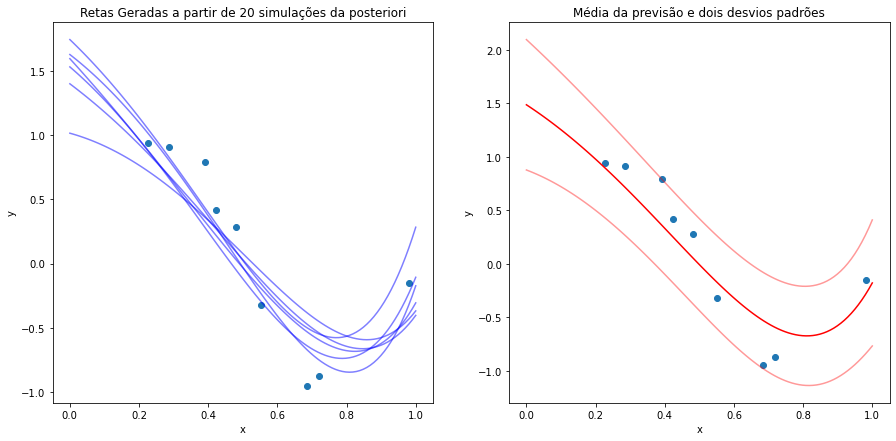

In [18]:
#Gráficos

fig, axs = plt.subplots(1, 2,figsize=(15,7))

axs[0].scatter(df_poly.x,t_poly)
#axs[0].scatter(df_poly.x,t_pred_poly)
axs[0].plot(df_poly_test.x, y_sample_poly_test, c='b',alpha= 0.5)
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Retas Geradas a partir de 20 simulações da posteriori')

axs[1].scatter(df_poly.x,t_poly)
#axs[1].scatter(df_poly.x,t_pred_poly)
axs[1].plot(df_poly_test.x, t_pred_poly_test, c='red')
axs[1].plot(df_poly_test.x, t_pred_poly_test_sup, c='r',alpha = 0.4)
axs[1].plot(df_poly_test.x, t_pred_poly_test_inf, c='r',alpha = 0.4)
#ax[1].fill_between(df_poly_test.x, t_pred_poly_test_sup.flatten(), t_pred_poly_test_inf.flatten(),alpha = 0.8)
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Média da previsão e dois desvios padrões')
plt.savefig('Polinomial')